# Cleanup system
This notebook presents the data clean up system for the project. Up on running the notebook, it will generate 
a new folder called cleaned_data, containing cleaned data. The cleaned data is the result of preprocessing the files containing in the folder raw_data

## Import libraries

In [1]:
import os
import warnings
import pandas as pd
from glob import glob
from itertools import chain
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Define some helper functions
The helper functions are useful for redundant tasks, scuh as plotting, reading data amonge others

In [2]:
def get_data_from_file(input_path, clean_input_data=False):
    """
    Return a pandas data frame from an input file contained
    in the 'raw_data' folder. This function returns a data frame
    without missing values if the argument 'clean_input_data=True'
    Argument:
        input_path: (str) the input file path
        clean_input_data: (boolean) if set to True, remove all 
                          all rows with missing values
    Return:
        df (pandas.core.frame.DataFrame) a pandas
            dataframe.
    """
    extension = os.path.basename(input_path)
    if os.path.splitext(extension)[1] == '.dat':
        df = pd.read_csv(f"{input_path}", \
                          sep="::",names=["BrukerID","FilmID","Rangering","Tidstempel"])
    elif os.path.splitext(extension)[1] == '.xlsx':
        df = pd.read_excel(f"{input_path}", sheet_name='film', index_col=0)
    elif os.path.splitext(extension)[1] == '.json':
        df = pd.read_json(f"{input_path}", orient="split")
    if (clean_input_data == True) and (df.isnull().sum().sum() != 0):
        df.dropna(inplace=True)
    return df
        
        
def show_missing_values_percentage(df, file_name):
    """ 
    Plot the missing value percentage for data 
    stored in a given file:
    Arguments:
        df: (pandas.core.frame.DataFrame) a pandas 
            dataframe.
        file_name (str) the input file name
    """
    mis_values = pd.DataFrame(df.isnull().sum()).apply(lambda x: x/len(df))
    plt.bar(mis_values.index, mis_values[0])
    plt.ylabel('%'); plt.title(f'Percentage of missing value for {file_name}'); plt.show()


## Input the name (or path) of the folder containing the raw data
Given the name (or the path) of the input folder containing the raw data list all files containing in this folder


In [3]:
input_folder = "raw_data"
paths = glob(f"{input_folder}/*")
paths

['raw_data\\bruker.json',
 'raw_data\\film.xlsx',
 'raw_data\\rangering.dat',
 'raw_data\\README']

The folder contains a readme file, with three additional files containing user data (bruker.jon), film data
(film.xlsx) and ranking data (rangering.dat)


## 1 - Get some basic information about each data

#### 1 - 1  Information about user data

In [4]:
user_df = get_data_from_file(paths[0])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BrukerID  6040 non-null   int64  
 1   Kjonn     5737 non-null   object 
 2   Alder     5046 non-null   float64
 3   Jobb      5447 non-null   float64
 4   Postkode  5589 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 283.1+ KB


In [5]:
user_df.describe()

,BrukerID,Alder,Jobb
count,6040.000000,5046.000000,5447.000000
mean,3020.465894,30.666072,9.104278
std,1743.799216,12.954723,11.239708
min,0.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,99.000000


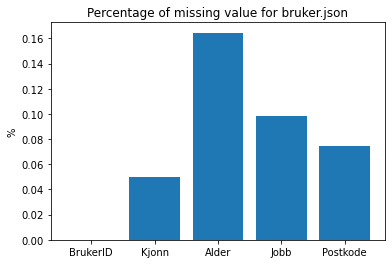

In [6]:
show_missing_values_percentage(user_df, 'bruker.json')

User data contains five features, with two categorical features (Kjonn and Poskode) and three numerical feautures (BrukerId, Alder, and Jobb). The data contains missing data, as shown from the above plot.

#### 1 - 2 - information about film data

In [7]:
film_df = user_df = get_data_from_file(paths[1])
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FilmID   3883 non-null   int64 
 1   Tittel   3883 non-null   object
 2   Sjanger  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [8]:
film_df.describe()

,FilmID
count,3883.000000
mean,1973.687098
std,1142.105375
min,0.000000
25%,985.500000
50%,1973.000000
75%,2963.500000
max,3952.000000


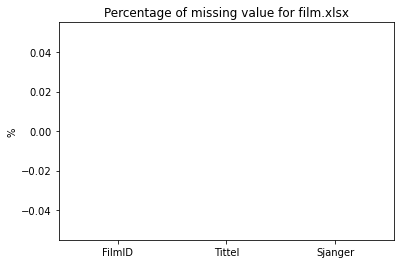

In [9]:
show_missing_values_percentage(user_df, 'film.xlsx')

The film data contains three features, with two categorical (Tittel, Sjanger) and one numerical feature (FilmID).
This data appears to have no missing values in any of the three features

#### 1 - 3 - Information about ranking data

In [10]:
ranking_df = get_data_from_file(paths[2])
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900188 entries, 0 to 900187
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BrukerID    900188 non-null  int64  
 1   FilmID      900188 non-null  int64  
 2   Rangering   900188 non-null  int64  
 3   Tidstempel  898696 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 27.5 MB


In [11]:
ranking_df.describe()

,BrukerID,FilmID,Rangering,Tidstempel
count,900188.000000,900188.000000,900188.000000,8.986960e+05
mean,2991.861171,1989.674352,4.279477,9.722414e+08
std,1736.206736,1126.366837,1.971074,1.214672e+07
min,0.000000,0.000000,1.000000,9.567039e+08
25%,1458.000000,1037.000000,3.000000,9.653029e+08
50%,2967.000000,1959.000000,4.000000,9.729904e+08
75%,4501.000000,2963.000000,5.000000,9.752202e+08
max,6040.000000,3952.000000,10.000000,1.046455e+09


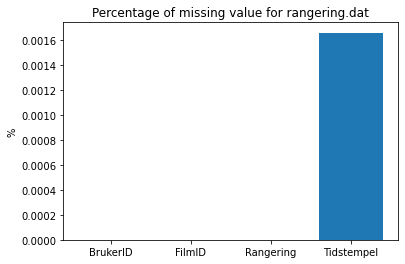

In [12]:
show_missing_values_percentage(ranking_df, 'rangering.dat')

Ranking data contains four features, all numerical. The only feature with missing value data is 'Tidstemple' 

## 2 - Clean data and generate cleaned data folder with cleaned csv files

In [13]:
for path in paths[:-1]:
    df = get_data_from_file(path, clean_input_data=True)
    assert df.isnull().sum().sum() == 0
    output_folder_name = "cleaned_data"
    output_file_name = os.path.basename(path).split('.')[0]
    if not os.path.exists(output_folder_name):
        os.makedirs(output_folder_name)
    print(f"saving {os.path.basename(path)} data into csv file in {output_folder_name} folder")
    df.to_csv(f"{output_folder_name}/{output_file_name}.csv")
print("Done !")

saving bruker.json data into csv file in cleaned_data folder
saving film.xlsx data into csv file in cleaned_data folder
saving rangering.dat data into csv file in cleaned_data folder
Done !
